In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv('test-100rows.csv',parse_dates=True)
df.head()


CODE      COUNTRY        DATE    HDI        TC        TD      STI  \
0  AFG  Afghanistan  2020-03-28  0.498  4.510860  0.693147  4.21346   
1  AFG  Afghanistan  2020-03-29  0.498  4.663439  1.098612  4.21346   
2  AFG  Afghanistan  2020-03-30  0.498  4.736198  1.386294  4.21346   
3  AFG  Afghanistan  2020-03-31  0.498  4.948760  1.386294  4.21346   
4  AFG  Afghanistan  2020-04-01  0.498  5.111988  1.386294  4.21346   

         POP    GDPCAP  
0  17.477233  7.497754  
1  17.477233  7.497754  
2  17.477233  7.497754  
3  17.477233  7.497754  
4  17.477233  7.497754

In [83]:
print(df.columns)

Index(['CODE', 'COUNTRY', 'DATE', 'HDI', 'TC', 'TD', 'STI', 'POP', 'GDPCAP'], dtype='object')


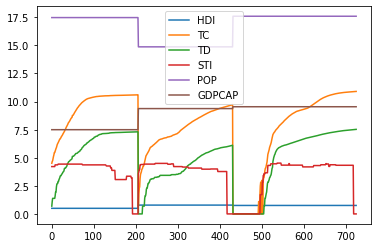

In [84]:
df.plot()

In [87]:
#DATE, GDPCAP
df_date_gdp = df.drop(columns=['CODE', 'COUNTRY', 'HDI', 'TC', 'TD', 'STI', 'POP'])
df_date_gdp.columns

Index(['DATE', 'GDPCAP'], dtype='object')

In [90]:
df_date_gdp['DATE'] = pd.to_datetime(df_date_gdp['DATE'])
print(df_date_gdp.info())
df_date_gdp.head()
#df_date_gdp.plot()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    725 non-null    datetime64[ns]
 1   GDPCAP  725 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.5 KB
None


DATE    GDPCAP
0 2020-03-28  7.497754
1 2020-03-29  7.497754
2 2020-03-30  7.497754
3 2020-03-31  7.497754
4 2020-04-01  7.497754

In [91]:
df_date_gdp.set_index('DATE',inplace=True)
df_date_gdp.head()

GDPCAP
DATE                
2020-03-28  7.497754
2020-03-29  7.497754
2020-03-30  7.497754
2020-03-31  7.497754
2020-04-01  7.497754

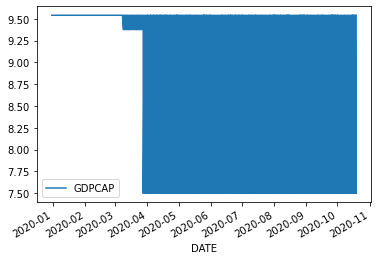

In [93]:
df_date_gdp.plot()

In [94]:
#testing if stationary data or not
from statsmodels.tsa.stattools import adfuller

In [95]:
test_result=adfuller(df_date_gdp['GDPCAP'])

In [96]:
def adfuller_test(gdp):
    result=adfuller(gdp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")



In [99]:
adfuller_test(df_date_gdp['GDPCAP'])

ADF Test Statistic : -1.5308175568456566
p-value : 0.5182150103493963
#Lags Used : 0
Number of Observations : 724
weak evidence against null hypothesis,indicating it is non-stationary 


In [123]:
#P-value is 0.51821 so the data is non staionary so we have to make it stationary by differencing
df_date_gdp['GDPCAP First Difference'] = df_date_gdp['GDPCAP'] - df_date_gdp['GDPCAP'].shift(1)

In [130]:
df_date_gdp['GDPCAP First Difference']

DATE
2020-03-28    NaN
2020-03-29    0.0
2020-03-30    0.0
2020-03-31    0.0
2020-04-01    0.0
             ... 
2020-10-15    0.0
2020-10-16    0.0
2020-10-17    0.0
2020-10-18    0.0
2020-10-19    0.0
Name: GDPCAP First Difference, Length: 725, dtype: float64

In [125]:
df_date_gdp['GDPCAP'].shift(1)

DATE
2020-03-28         NaN
2020-03-29    7.497754
2020-03-30    7.497754
2020-03-31    7.497754
2020-04-01    7.497754
                ...   
2020-10-15    9.540639
2020-10-16    9.540639
2020-10-17    9.540639
2020-10-18    9.540639
2020-10-19    9.540639
Name: GDPCAP, Length: 725, dtype: float64

In [136]:
df_date_gdp['GDPCAP Seasonal Difference'] = df_date_gdp['GDPCAP'] - df_date_gdp['GDPCAP'].shift(12)
df_date_gdp['GDPCAP Seasonal Difference']

DATE
2020-03-28    NaN
2020-03-29    NaN
2020-03-30    NaN
2020-03-31    NaN
2020-04-01    NaN
             ... 
2020-10-15    0.0
2020-10-16    0.0
2020-10-17    0.0
2020-10-18    0.0
2020-10-19    0.0
Name: GDPCAP Seasonal Difference, Length: 725, dtype: float64

In [138]:
df_date_gdp.head()

GDPCAP  GDPCAP First Difference  GDPCAP Seasonal Difference
DATE                                                                     
2020-03-28  7.497754                      NaN                         NaN
2020-03-29  7.497754                      NaN                         NaN
2020-03-30  7.497754                      NaN                         NaN
2020-03-31  7.497754                      NaN                         NaN
2020-04-01  7.497754                      NaN                         NaN

In [140]:
#Add again dickey fuller test
adfuller_test(df_date_gdp['GDPCAP First Difference'].dropna())

ADF Test Statistic : -4.940112337646393
p-value : 2.911809098046273e-05
#Lags Used : 20
Number of Observations : 699
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [141]:
adfuller_test(df_date_gdp['GDPCAP Seasonal Difference'].dropna())

ADF Test Statistic : -4.521766589916955
p-value : 0.00017957862706404395
#Lags Used : 12
Number of Observations : 700
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


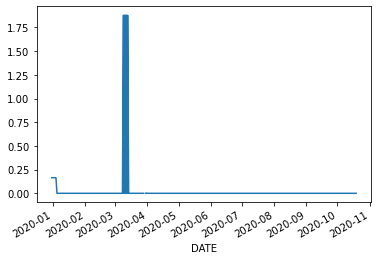

In [144]:
from pandas.plotting import autocorrelation_plot
#plotting GDPCAP First Difference
df_date_gdp['GDPCAP First Difference'].plot()

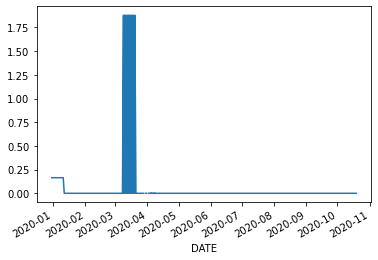

In [145]:
#plotting GDPCAP Seasonal Difference
df_date_gdp['GDPCAP Seasonal Difference'].plot()

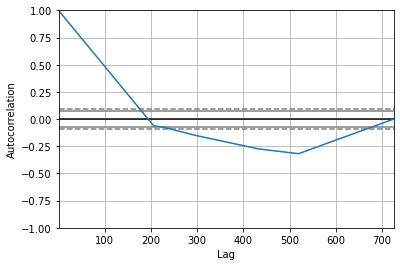

In [147]:
#autocorrelation graph
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_date_gdp['GDPCAP'])
plt.show()

In [148]:
from statsmodels.tsa.arima_model import ARIMA #select only if data is non-seasonal

In [158]:
model=ARIMA(df_date_gdp['GDPCAP'],order=(1,1,1))
model_fit=model.fit()

C:\Users\vatika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vatika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\vatika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vatika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will 

In [159]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.GDPCAP   No. Observations:                  724
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 898.541
Method:                       css-mle   S.D. of innovations              0.070
Date:                Fri, 16 Apr 2021   AIC                          -1789.081
Time:                        17:47:33   BIC                          -1770.742
Sample:                             1   HQIC                         -1782.003
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0031      0.001      2.804      0.005       0.001       0.005
ar.L1.D.GDPCAP     0.9929      0.005    184.499      0.000       0.982       1.003
ma.L1.D.GDPCAP    -1.0000      0.004   -268.655      0.000      -1.007      -0.993
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0071           +0.0000j            1.0071            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

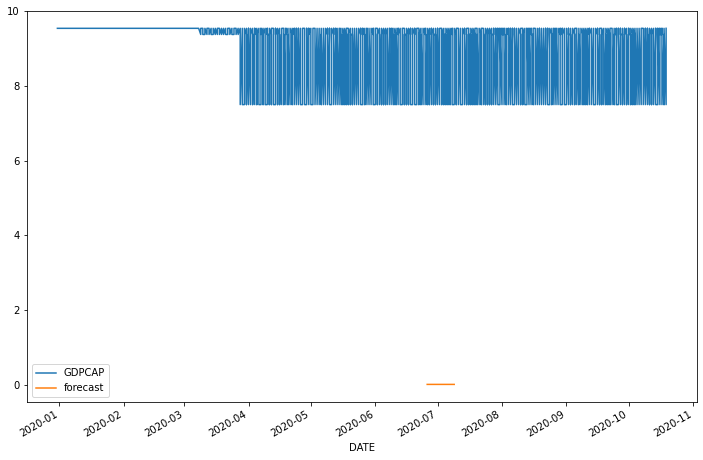

In [160]:
df_date_gdp['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df_date_gdp[['GDPCAP','forecast']].plot(figsize=(12,8))

#The forecast does not fit well on the graph. This implies that our data is seasonal

In [161]:
import statsmodels.api as sm

C:\Users\vatika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vatika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\vatika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\vatika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will 

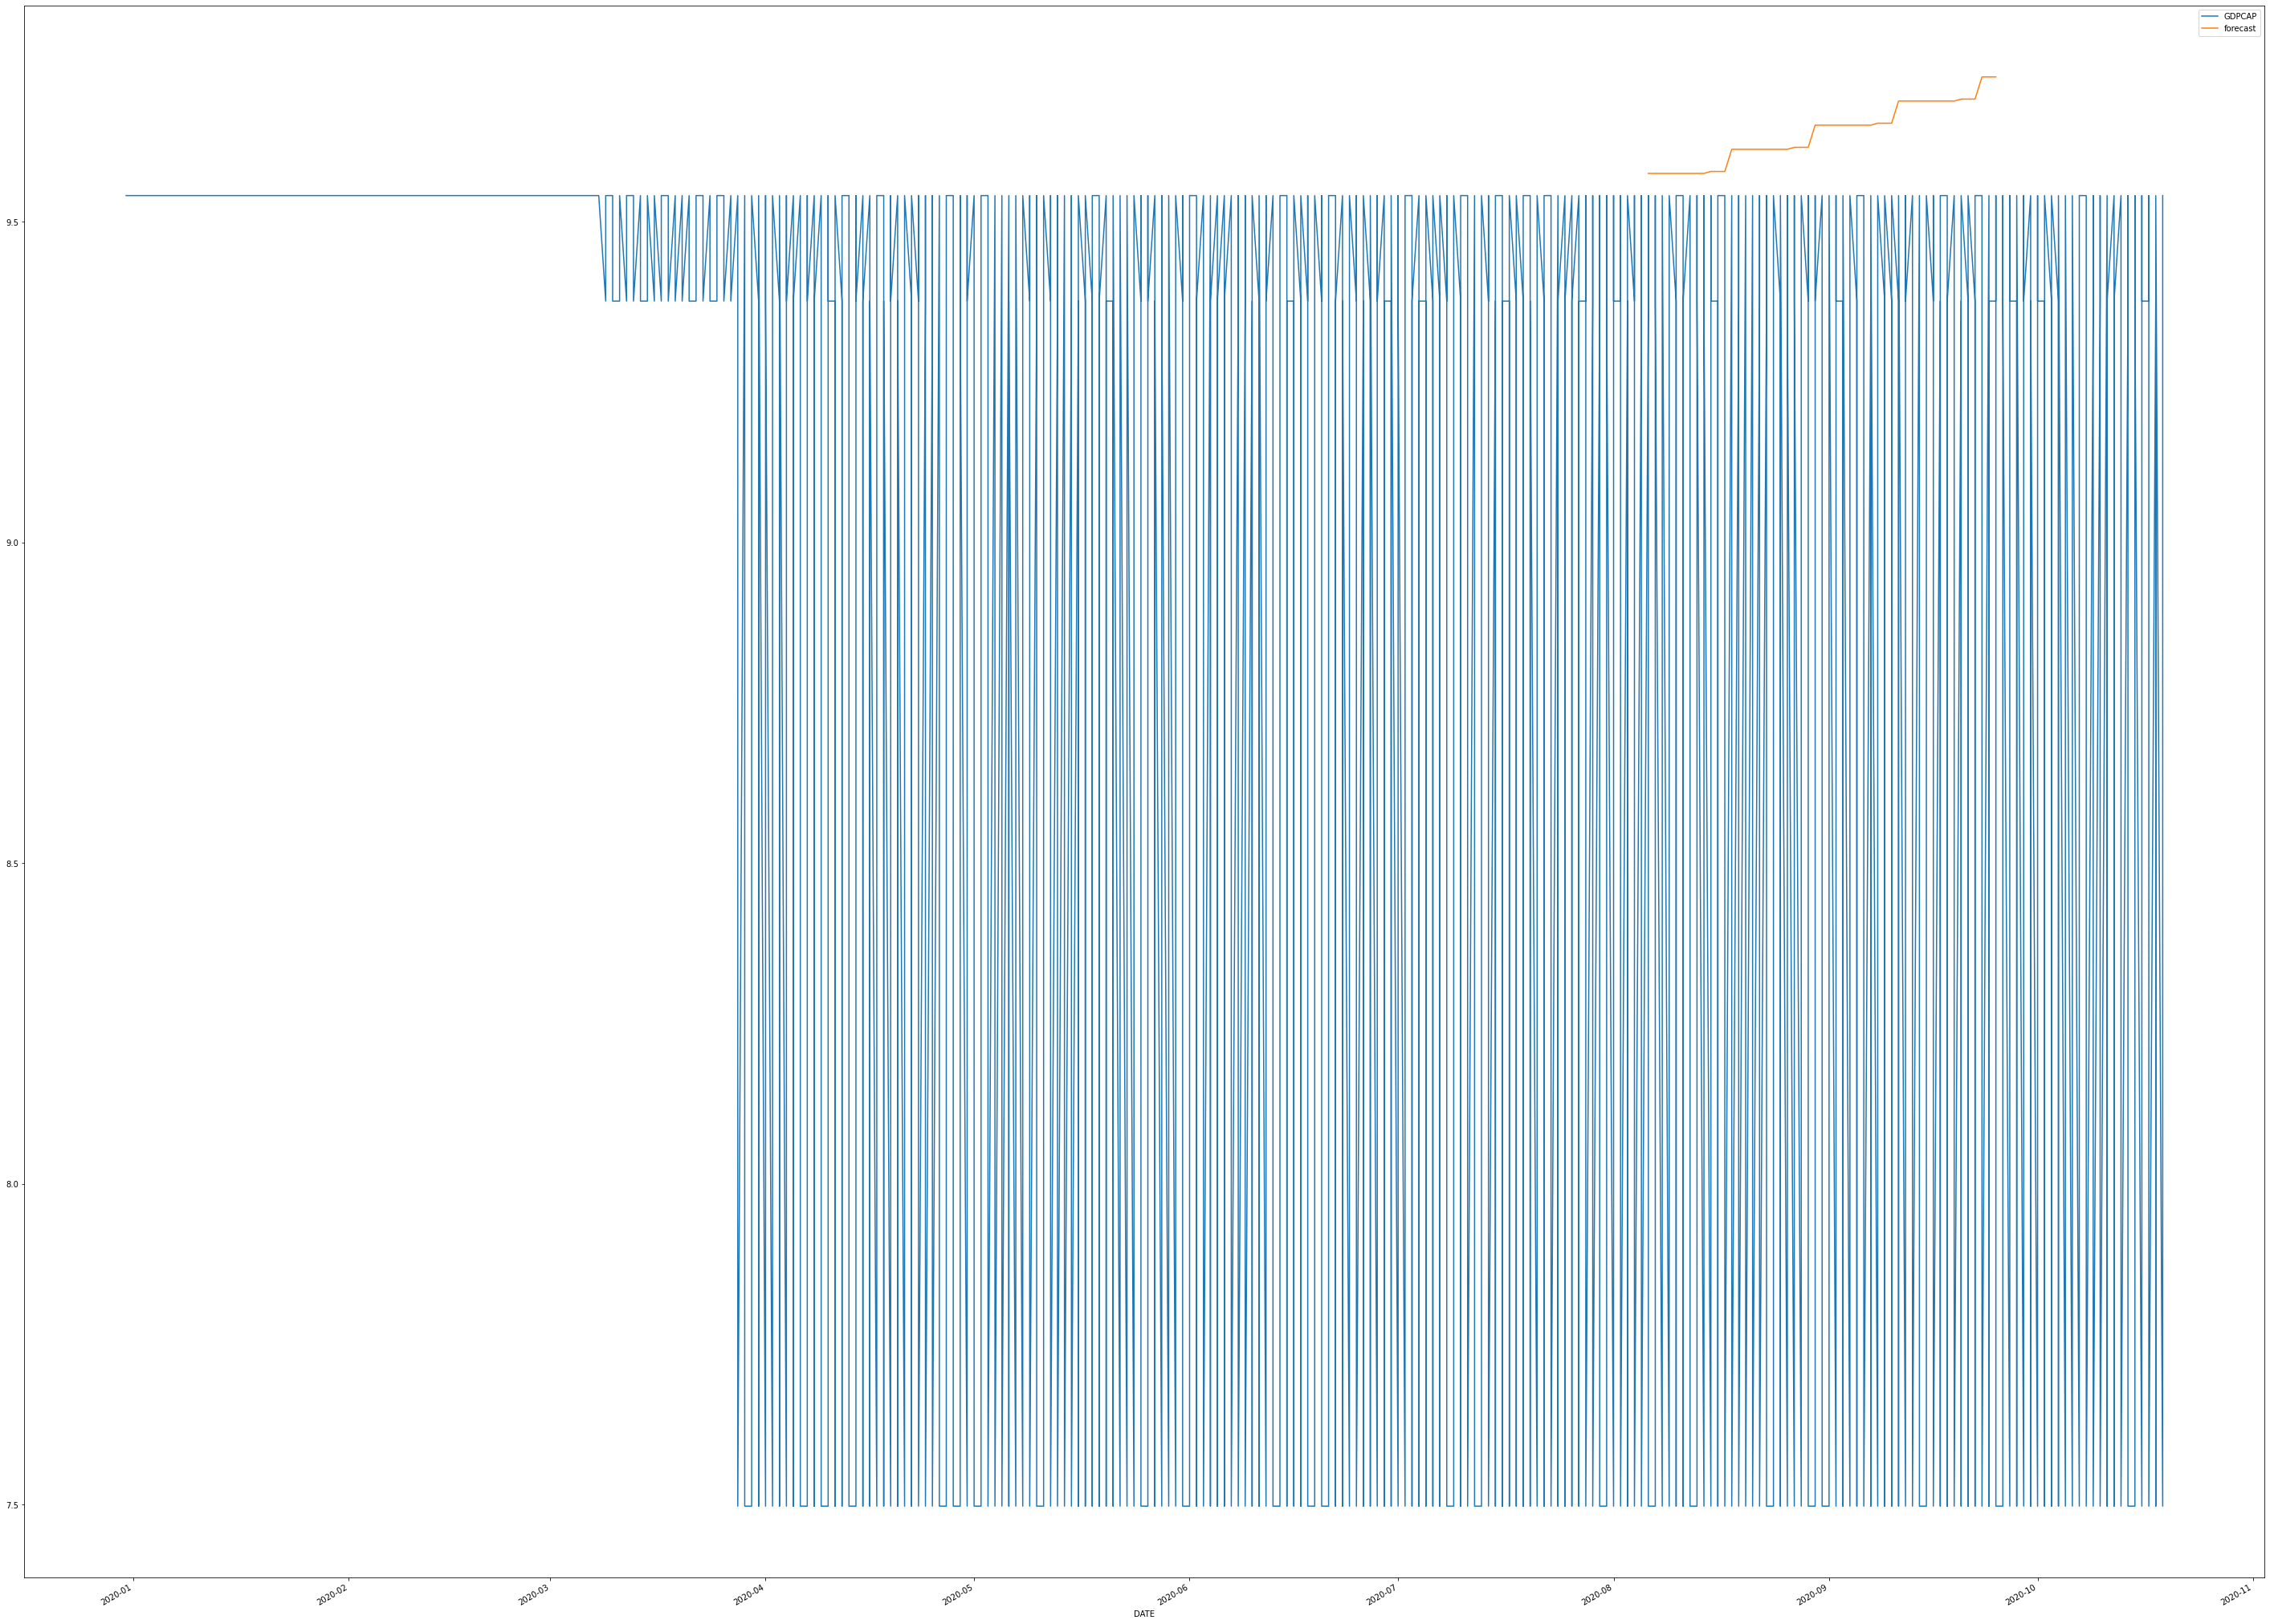

In [198]:
model=sm.tsa.statespace.SARIMAX(df_date_gdp['GDPCAP'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
df_date_gdp['forecast']=results.predict(start=650,end=700,dynamic=True)
df_date_gdp[['GDPCAP','forecast']].plot(figsize=(50,40))

In [191]:
from pandas.tseries.offsets import DateOffset
future_dates=[df_date_gdp.index[-1]+ DateOffset(months=x)for x in range(0,5)]

In [192]:
df_future=pd.DataFrame(index=future_dates[1:],columns=df_date_gdp.columns)
df_future.tail()

GDPCAP GDPCAP First Difference GDPCAP Seasonal Difference forecast
2020-11-19    NaN                     NaN                        NaN      NaN
2020-12-19    NaN                     NaN                        NaN      NaN
2021-01-19    NaN                     NaN                        NaN      NaN
2021-02-19    NaN                     NaN                        NaN      NaN

In [193]:
df_forecast=pd.concat([df_date_gdp,df_future])

In [197]:
df_forecast['forecast'] = results.predict(start = 651, end = 800, dynamic= True)
df_forecast[['GDPCAP', 'forecast']].plot(figsize=(200, 150))

C:\Users\vatika\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:580: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
